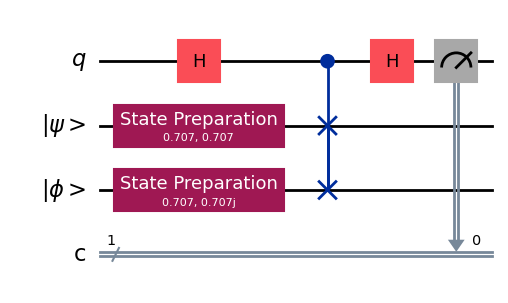

In [105]:
# A SWAP test to determine the inner product of 2 states |ϕ⟩ and |ψ⟩ :   <ψ|ϕ>
# If the states are the same then <ψ|ϕ>=1
# If the states are orthogonal then <ψ|ϕ>=0
# <ψ|ϕ> can take any value in [0,1] and is basically a indicator of the "distance" between these two states


import numpy as np
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler

q = QuantumRegister(1, 'q')
p = QuantumRegister(1, '|ψ>')
f = QuantumRegister(1, '|ϕ>')
c = ClassicalRegister(1, name='c')

qc = QuantumCircuit(q, p, f, c)

qc.prepare_state(Statevector([1/np.sqrt(2), 1/np.sqrt(2)]),1)
qc.prepare_state(Statevector([1/np.sqrt(2), 1j/np.sqrt(2)]),2)
qc.h(0)
qc.cswap(0, 1, 2)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')



In [106]:
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
backend = AerSimulator()
# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)
# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
num = 4096
job_sim = backend.run(qc_compiled, shots=num)
# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

# p_0 = P(qubit q is 0) = 1/2 *( 1 + |<ψ|ϕ>|^2)
n_0 = counts['0']
p_0 = n_0/num
if p_0 < 1/2:
    p_0 = 1/2
inner_product = np.sqrt((p_0)*2-1)
print('<ψ|ϕ> = ' + str(inner_product))

{'1': 1059, '0': 3037}
<ψ|ϕ> = 0.694917373685534
